### Name : Ghosh Kushanava Amitava
### Roll No : 220123083
### Course : MA323

In [1]:
!pip install yfinance

     ------------------------------------ 101.1/101.1 kB 726.5 kB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 939.5/939.5 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=ad9a82e0322081ea38ab3b7d80bd3ceab9d3c63fc7b84c1388d7a75842ee58c7
  Stored in directory: c:\users\kiit\appdata\local\pip\cache\wheels\fb\8f\48\21f2805b10ea9f7bba0d72f4a4b353045f50d91cbc7cce1b99
Successfully b

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math

In [10]:
# Obtaining Daily Price Data of Stock [Apple]
ticker = 'AAPL'
Start = '2018-12-31'
End = '2020-01-01'
df = yf.download(ticker, start = Start, end = End)
rdf = df['Adj Close']['AAPL']
P = rdf.values
print(P)

[*********************100%***********************]  1 of 1 completed

[37.70705414 37.75008392 33.98989487 35.4408989  35.36201477 36.03613281
 36.64807892 36.76522446 36.40425873 35.85683441 36.5907135  37.03773499
 37.25764465 37.48713684 36.64570236 36.79390335 36.50226593 37.71183777
 37.36283493 36.97557068 39.50229263 39.78676224 39.80587769 40.93656158
 41.63696289 41.65131378 40.86245728 40.91046906 40.67520523 41.02570724
 40.85525894 41.00410461 40.91286469 41.03530502 41.29938507 41.06652069
 41.52505875 41.82754517 41.85155106 41.98118591 41.56826782 42.00519562
 42.21645737 42.13963699 41.89716339 41.41223145 41.51065445 42.94867325
 43.43122101 43.62326813 44.10821152 44.68198395 45.13812256 44.78040314
 45.17172241 46.8354187  45.86554337 45.31097031 44.8428421  45.24615097
 45.30617142 45.60145569 45.91115189 46.57853699 46.89783859 46.97946167
 47.29395676 48.03818512 47.89413071 48.16300964 47.76209259 47.74288559
 47.82931137 47.83411026 48.76558685 48.94084167 49.10168457 49.80989456
 49.73308563 49.28174591 49.04647827 49.12090302 48

In [13]:
# Obtaining Daily Returns using Daily Prices
T = 252
R = np.zeros(T)
for i in range(len(P)-1):
    R[i] = (P[i+1]/P[i]) - 1
print(R)

[ 1.14116009e-03 -9.96074357e-02  4.26892767e-02 -2.22579357e-03
  1.90633381e-02  1.69814588e-02  3.19649875e-03 -9.81812934e-03
 -1.50373702e-02  2.04669236e-02  1.22168015e-02  5.93744915e-03
  6.15959999e-03 -2.24459521e-02  4.04415741e-03 -7.92624305e-03
  3.31368973e-02 -9.25446382e-03 -1.03649590e-02  6.83349008e-02
  7.20134416e-03  4.80447438e-04  2.84049483e-02  1.71094317e-02
  3.44667097e-04 -1.89395348e-02  1.17496066e-03 -5.75069976e-03
  8.61709270e-03 -4.15467069e-03  3.64324389e-03 -2.22514136e-03
  2.99270997e-03  6.43543523e-03 -5.63844666e-03  1.11657391e-02
  7.28443087e-03  5.73925383e-04  3.09749230e-03 -9.83578910e-03
  1.05110898e-02  5.02941948e-03 -1.81967835e-03 -5.75405057e-03
 -1.15743384e-02  2.37666507e-03  3.46421616e-02  1.12354521e-02
  4.42186783e-03  1.11166222e-02  1.30082905e-02  1.02085577e-02
 -7.92499557e-03  8.73862778e-03  3.68304816e-02 -2.07081598e-02
 -1.20912785e-02 -1.03314540e-02  8.99382933e-03  1.32653155e-03
  6.51752867e-03  6.79136

In [126]:
# Linear Congruential Generator (LCG)
def lcg(a, c, m, seed, n):
    random_numbers = []
    X = seed
    for _ in range(n):
        X = (a * X + c) % m
        random_numbers.append(X / m)  # Normalizing to [0, 1]
    return np.array(random_numbers)

In [127]:
# Box-Muller method using LCG
def box_muller(a, c, m, seed, n):
    u1 = lcg(a, c, m, seed, n)
    u2 = lcg(a, c, m, seed + 1, n)
    z0 = [math.sqrt(-2 * math.log(u1[i])) * math.cos(2 * math.pi * u2[i]) for i in range(n)]
    z1 = [math.sqrt(-2 * math.log(u1[i])) * math.sin(2 * math.pi * u2[i]) for i in range(n)]
    return np.array(z0)

In [128]:
# Initialized constants for generating random numbers from LCG
m = 2**31 - 1
a = 1103515245
c = 12345
seed = 42

# Determine the number of paths and points per path
values = 252
paths = 3

# Define the time step size and t-axis
interval = [0.0, 1.0]
dt = (interval[1] - interval[0]) / (values-1)
t_axis = np.linspace(interval[0], interval[1], values)

# Making a 2-D dimensional array consisting of 252 normal random numbers for each paths
Z = np.zeros((paths, values))
for i in range(paths):
    C = box_muller(a, c, m, seed, values)
    Z[i] = C
    seed += 1

### Q.1

In [129]:
A = np.mean(R)
B = np.std(R)
µ = 252 * A
σ = math.sqrt(252) * B
print("Mean of Daily Returns: ", µ)
print("Standard Deviation of Daily Returns: ", σ)

Mean of Daily Returns:  0.6714782183415106
Standard Deviation of Daily Returns:  0.26086462693854306


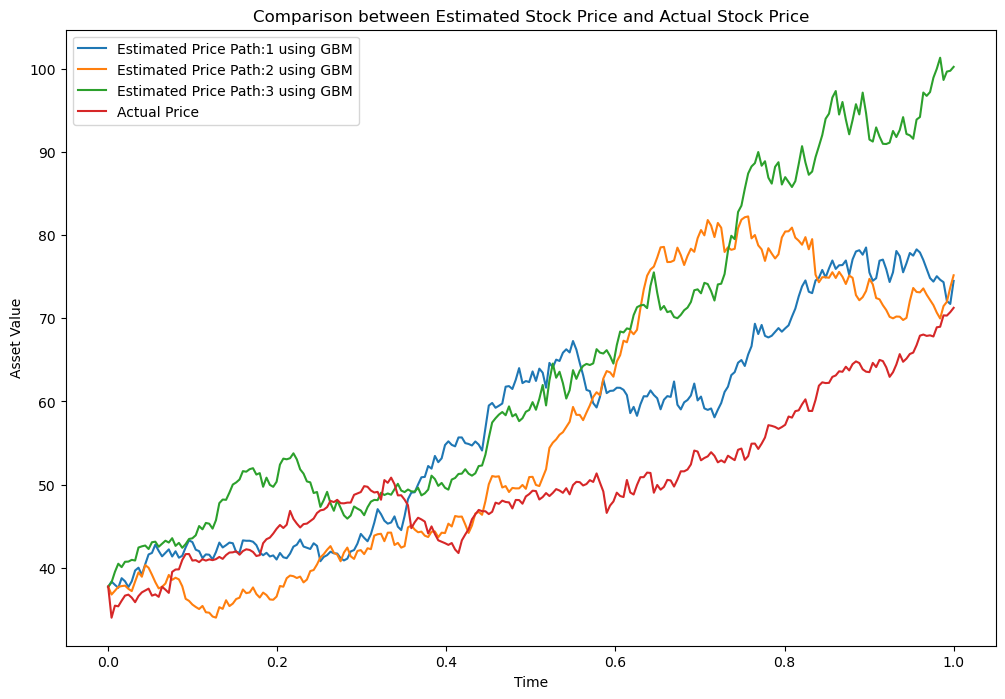

In [130]:
# Compare the paths taken by estimated stock price using GBM and actual stock price
S = P[0] * np.ones((paths, values)) # To start with S(0) = P(0)
for i in range(values-1):
    S[:, i+1] = S[:, i] * np.exp((µ - 0.5 * σ * σ) * dt + σ * np.sqrt(dt) * Z[:, i])
    
# Plot these paths
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, S[path, :], label=f'Estimated Price Path:{path+1} using GBM')
ax.plot(t_axis, P[1:], label="Actual Price")
ax.set_title("Comparison between Estimated Stock Price and Actual Stock Price")
ax.set_xlabel("Time")
ax.set_ylabel("Asset Value")
ax.legend()
plt.show()

### Q.2

In [131]:
µ = 0.06
σ = 0.3

# Determine the number of paths and points per path
values = 1000
paths = 1

# Define the time step size and t-axis
interval = [0.0, 1.0]
dt = (interval[1] - interval[0]) / (values-1)
t_axis = np.linspace(interval[0], interval[1], values)

# Making a 2-D dimensional array consisting of 1000 normal random numbers for each paths
Z = np.zeros((paths, values))
for i in range(paths):
    C = box_muller(a, c, m, seed, values)
    Z[i] = C
    seed += 1

### (a)

In [132]:
# Sample 1 Jump Diffusion Process (considering only the Weiner Process W) paths
X = 5 * np.ones((paths, values)) # To start with X(0) = 5
for i in range(values-1):
    X[:, i+1] = X[:, i] + (µ - 0.5 * σ * σ) * dt + σ * np.sqrt(dt) * Z[:, i]

### (b)

In [134]:
def poisson(λ, seed):
    U = lcg(a, c, m, seed, values)[0]
    L = np.exp(-λ)
    k = 0
    while U > L:
        k += 1
        L += (np.exp(-λ) * (λ ** k) / math.factorial(k))
    return k

In [143]:
def jump(λ, seed):
    X = 5 * np.ones(values)
    Z = box_muller(a, c, m, seed, values)
    for i in range(values-1):
        X[i+1] = X[i] + (µ - 0.5 * σ * σ) * dt + σ * np.sqrt(dt) * Z[i]
    for i in range(1, values-1):
        P = poisson(λ*dt, seed)
        H = box_muller(a, c, m, seed, P)
        Y = 0.1 * H + 1
        X[i] += np.sum(np.log(Y))
        seed += 1
    return X

### (c)

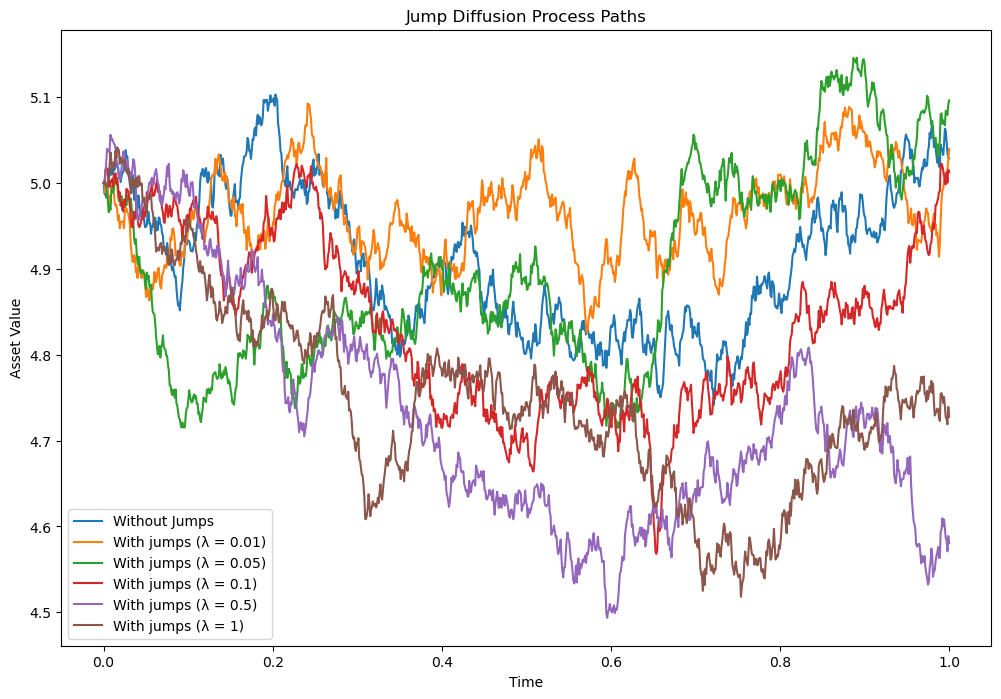

In [138]:
# Plot these paths
lambdas = [0.01, 0.05, 0.1, 0.5, 1]
def plot_graph(seed):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    for path in range(paths):
        ax.plot(t_axis, X[path, :], label=f'Without Jumps')
    for λ in lambdas:
        ax.plot(t_axis, jump(λ, seed), label="With jumps (λ = " + str(λ) + ")")
        seed += 1
    ax.set_title("Jump Diffusion Process Paths")
    ax.set_xlabel("Time")
    ax.set_ylabel("Asset Value")
    ax.legend()
    plt.show()
    
plot_graph(seed)

### (d)

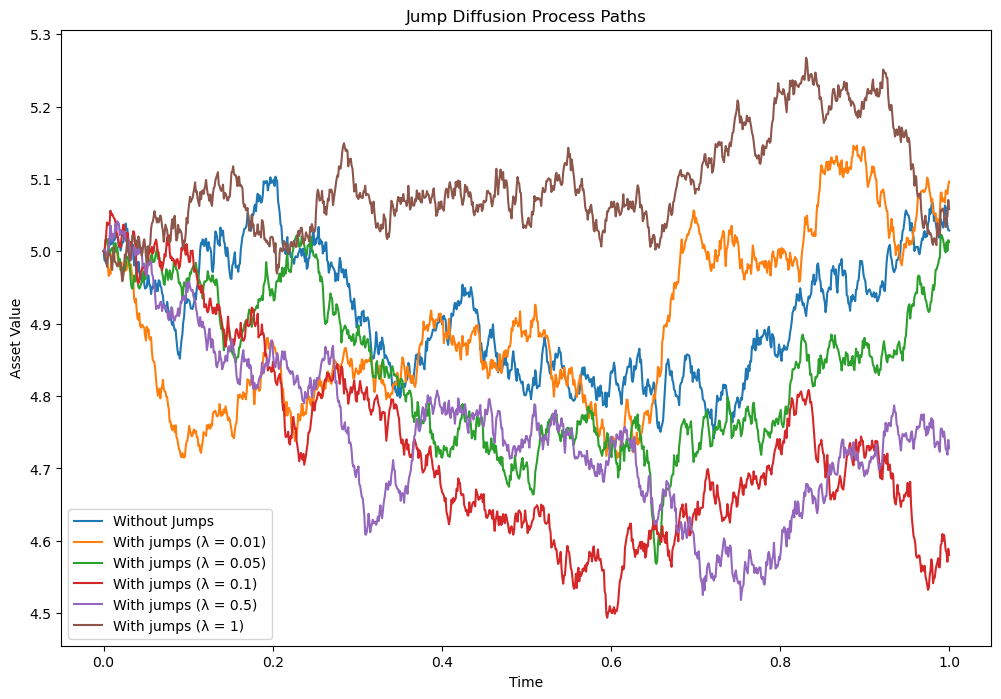

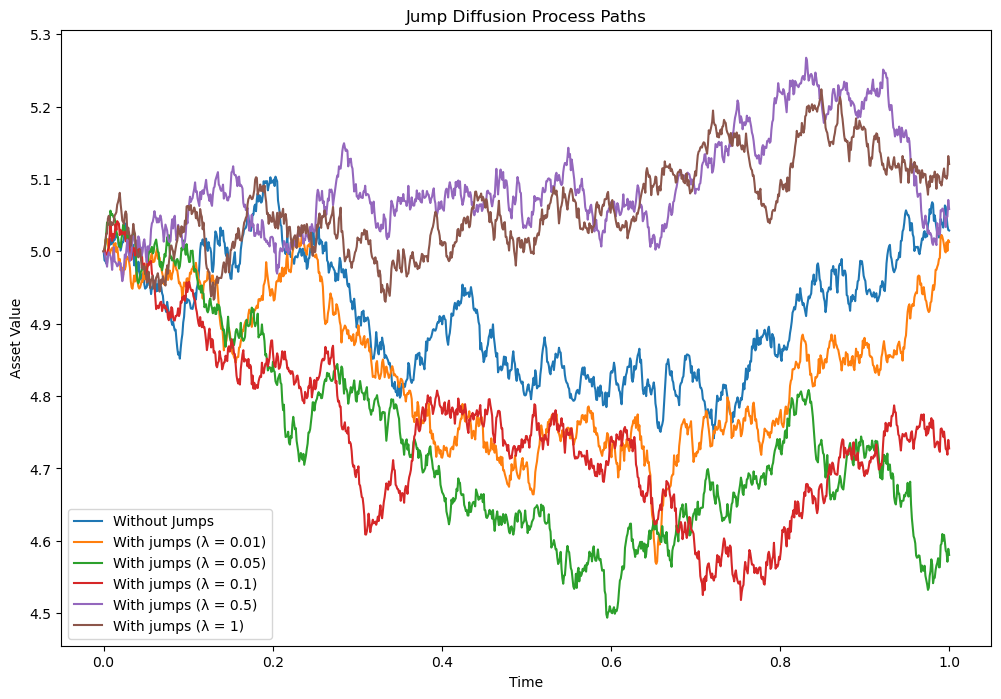

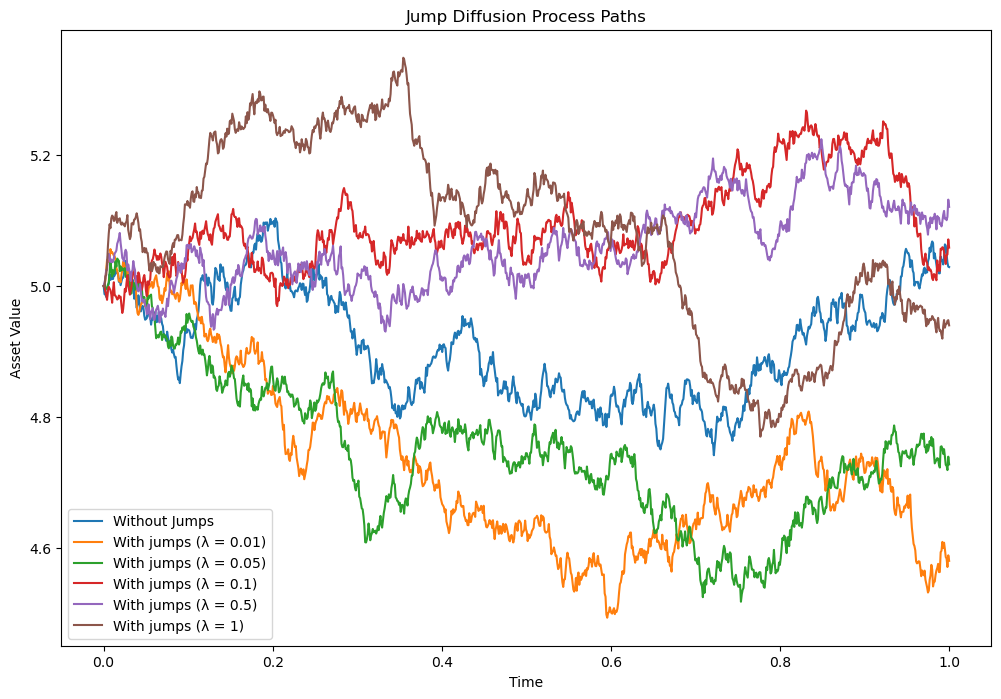

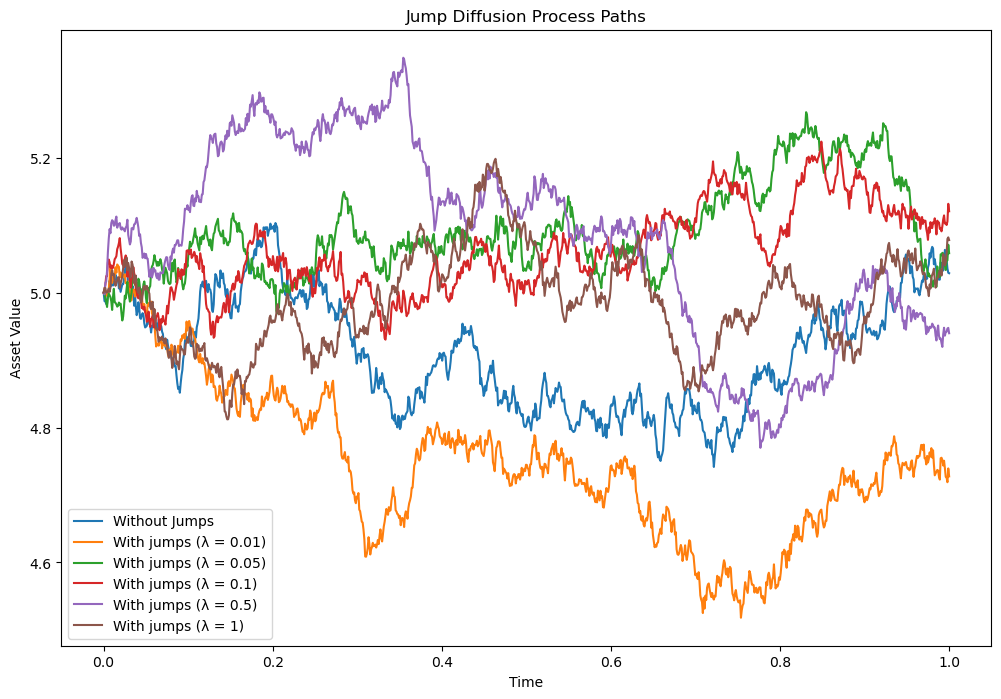

In [140]:
# Re-running the simulation 4 times
plot_graph(seed+1)
plot_graph(seed+2)
plot_graph(seed+3)
plot_graph(seed+4)